In [1]:
from read import Scope
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import signal

scope = Scope()
scope.setup()


<ipython-input-8-3cf320ef7fa4>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f[0:200], Sxx[0:200])


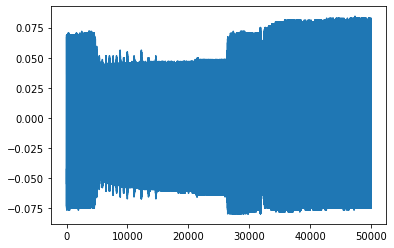

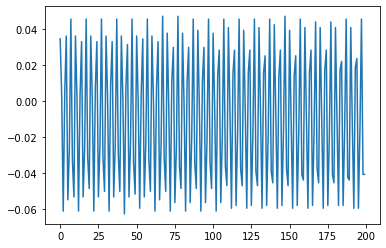

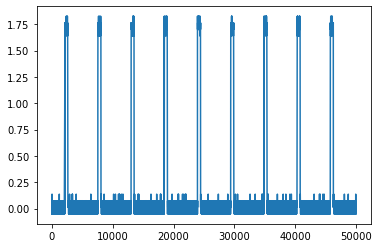

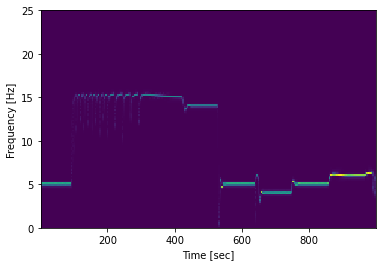

In [8]:
file_name = 'data/scope_12.csv'



traces = scope.get_traces()

rf = (traces[0]/(2**16)) * 0.4 -0.2
pulse_time = (traces[1]/(2**16)) * 16 - 8 + 0.45

plt.figure(1)
plt.plot(rf)

plt.figure(4)
plt.plot(rf[20000:20200])

plt.figure(2)
plt.plot(pulse_time)

plt.figure(3)
f, t, Sxx = signal.spectrogram(rf, 50, nfft=256)
plt.pcolormesh(t, f[0:200], Sxx[0:200])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

df = pd.DataFrame()
df['rf'] = rf
df['pulse_time'] = pulse_time


df.to_csv(file_name, sep=',', encoding='utf-8')
